In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file = r"./Cleaned_dataset.csv"
df = pd.read_csv(file)
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_of_journey    452088 non-null  datetime64[ns]
 1   Journey_day        452088 non-null  object        
 2   Airline            452088 non-null  object        
 3   Flight_code        452088 non-null  object        
 4   Class              452088 non-null  object        
 5   Source             452088 non-null  object        
 6   Departure          452088 non-null  object        
 7   Total_stops        452088 non-null  object        
 8   Arrival            452088 non-null  object        
 9   Destination        452088 non-null  object        
 10  Duration_in_hours  452088 non-null  float64       
 11  Days_left          452088 non-null  int64         
 12  Fare               452088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), 

In [3]:
df.head()

Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  
0          1  5335  
1          1  5899  
2          1  5801  
3          1  5794  
4          1  5955

In [4]:
df = df.dropna()
df.drop_duplicates( keep='first', inplace=True)
df = df.reset_index(drop = True)
df.shape

(445366, 13)

In [5]:
df.describe()

Date_of_journey  Duration_in_hours      Days_left  \
count                         445366      445366.000000  445366.000000   
mean   2023-02-09 14:49:39.837706752          12.182491      25.617822   
min              2023-01-16 00:00:00           0.750000       1.000000   
25%              2023-01-28 00:00:00           6.500000      13.000000   
50%              2023-02-10 00:00:00          11.250000      26.000000   
75%              2023-02-22 00:00:00          16.333300      38.000000   
max              2023-03-06 00:00:00          43.583300      50.000000   
std                              NaN           7.299361      14.302610   

                Fare  
count  445366.000000  
mean    22919.747165  
min      1307.000000  
25%      8712.000000  
50%     13362.000000  
75%     36980.000000  
max    143019.000000  
std     20394.214040

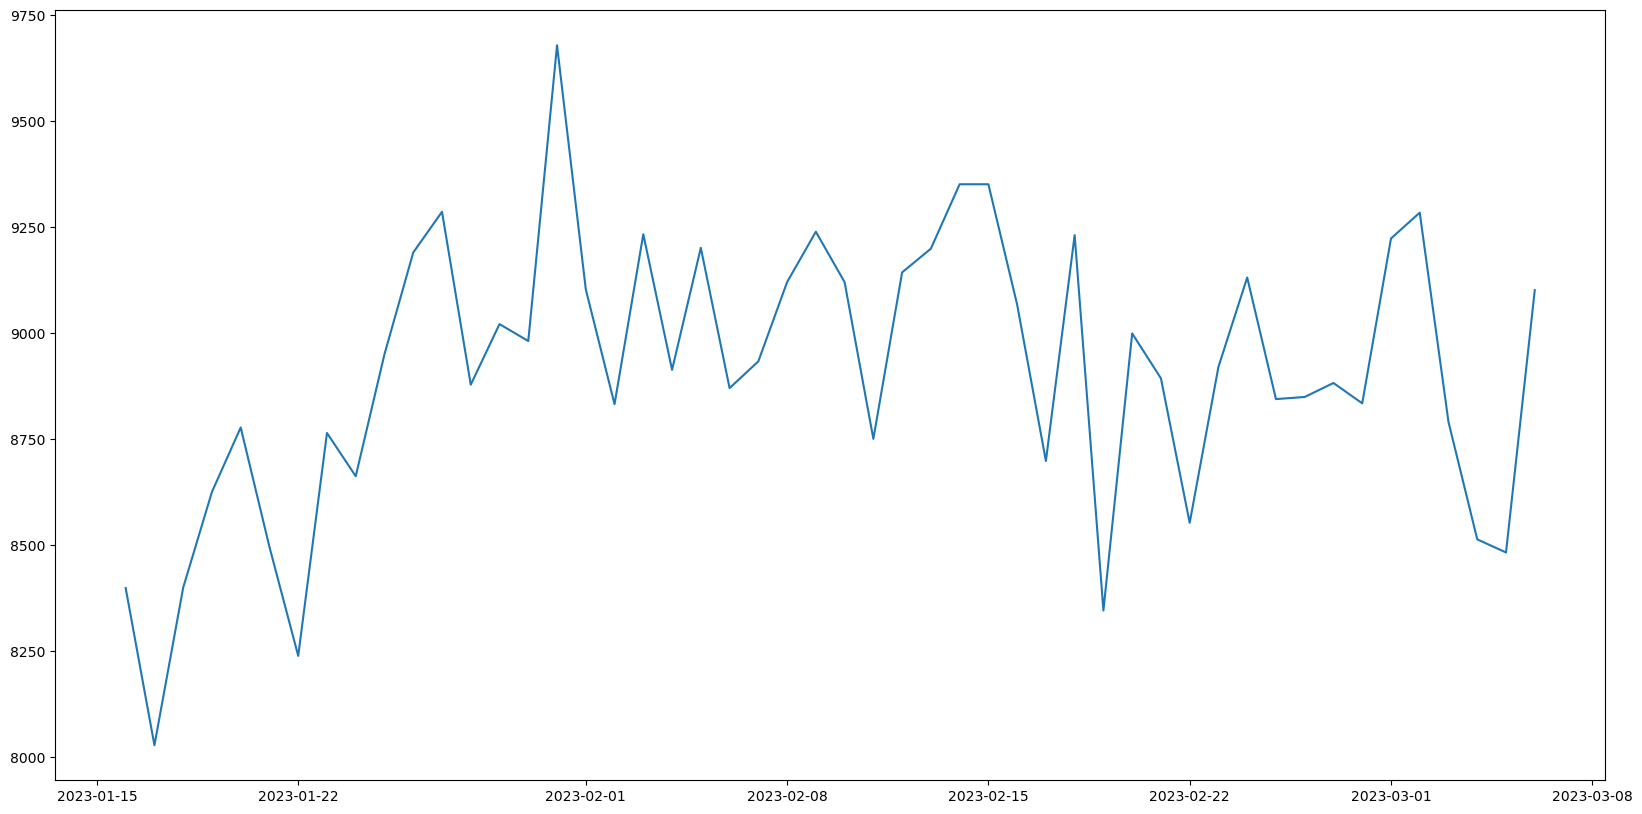

In [6]:
flights_per_day = df.groupby('Date_of_journey').size().reset_index(name='Total_Flights')
plt.figure (figsize=(20,10))
plt.plot(flights_per_day['Date_of_journey'], flights_per_day['Total_Flights'])

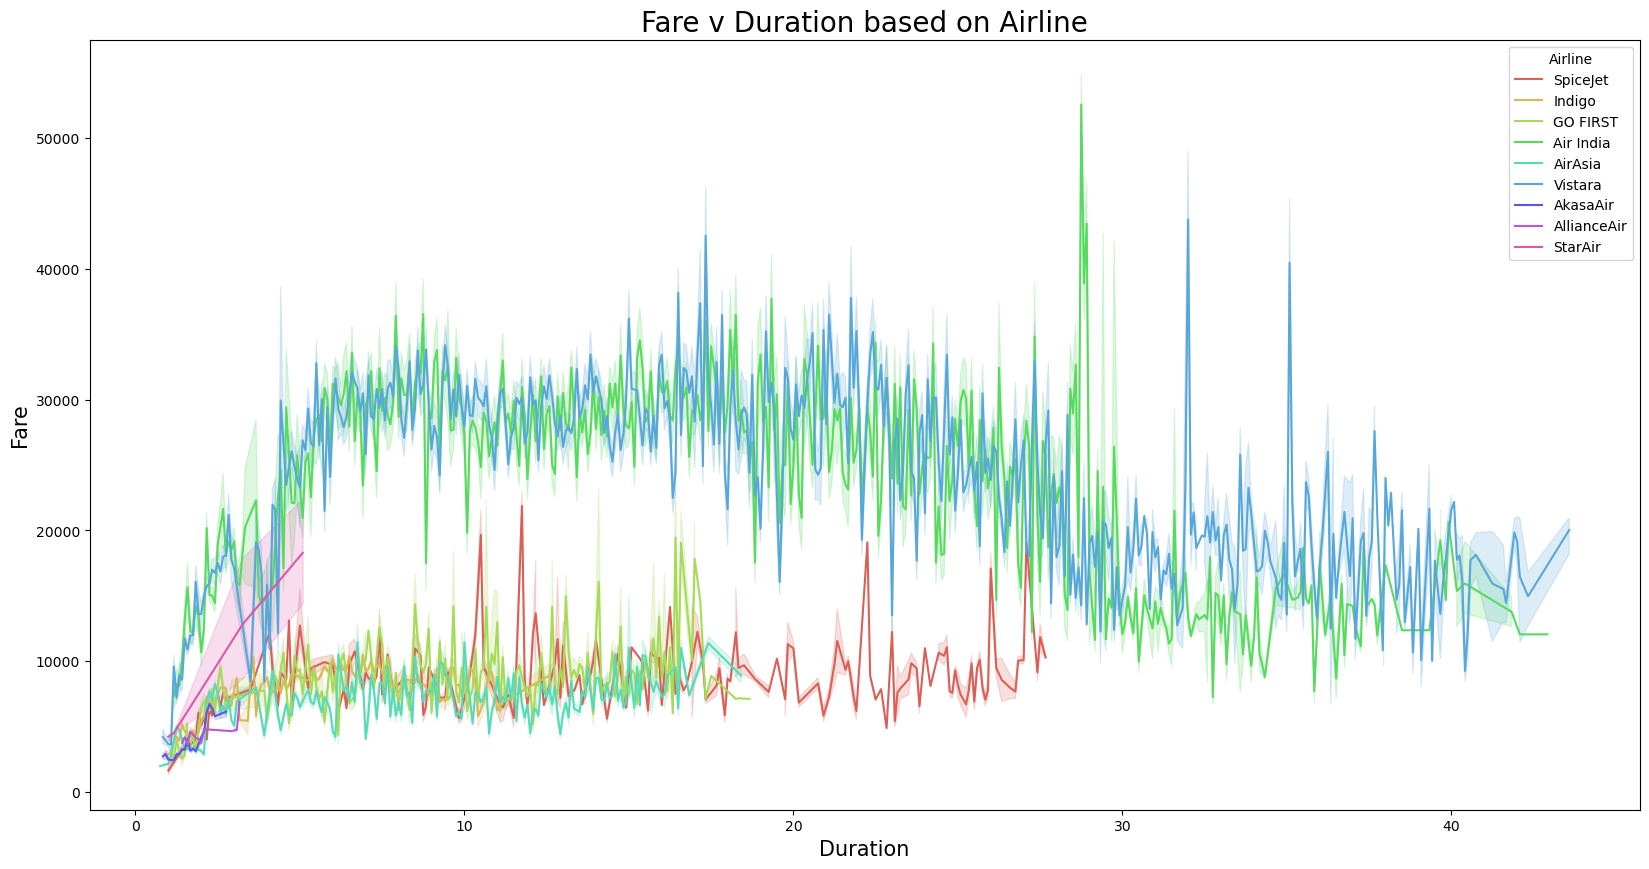

In [7]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = df,x = 'Duration_in_hours',y = 'Fare',hue = 'Airline',palette = 'hls')
plt.title('Fare v Duration based on Airline',fontsize = 20)
plt.xlabel('Duration',fontsize = 15)
plt.ylabel('Fare',fontsize = 15)
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
ohencode = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encode = LabelEncoder()

In [9]:
# One Hot encoding the rest of the categorical data
for col in ["Journey_day", "Airline","Class", "Source", "Departure", "Total_stops", "Arrival", "Destination"]:
    ohetransform = ohencode.fit_transform(df[[col]])
    df = pd.concat([df, ohetransform], axis=1).drop(columns=[col])

# Label Encoding Flight_code
df.Flight_code = encode.fit_transform(df.Flight_code)

In [10]:
df.head()

Date_of_journey  Flight_code  Duration_in_hours  Days_left  Fare  \
0      2023-01-16         1209             2.0833          1  5335   
1      2023-01-16          164             2.3333          1  5899   
2      2023-01-16          942             2.1667          1  5801   
3      2023-01-16         1224             2.0833          1  5794   
4      2023-01-16          852             2.1667          1  5955   

   Journey_day_Friday  Journey_day_Monday  Journey_day_Saturday  \
0                 0.0                 1.0                   0.0   
1                 0.0                 1.0                   0.0   
2                 0.0                 1.0                   0.0   
3                 0.0                 1.0                   0.0   
4                 0.0                 1.0                   0.0   

   Journey_day_Sunday  Journey_day_Thursday  ...  Arrival_6 AM - 12 PM  \
0                 0.0                   0.0  ...                   0.0   
1                 0.0                   0.0  ...                   0.0   
2                 0.0                   0.0  ...                   0.0   
3                 0.0                   0.0  ...                   0.0   
4                 0.0                   0.0  ...                   0.0   

   Arrival_After 6 PM  Arrival_Before 6 AM  Destination_Ahmedabad  \
0                 1.0                  0.0                    0.0   
1                 0.0                  1.0                    0.0   
2                 0.0                  1.0                    0.0   
3                 1.0                  0.0                    0.0   
4                 1.0                  0.0                    0.0   

   Destination_Bangalore  Destination_Chennai  Destination_Delhi  \
0                    0.0                  0.0                0.0   
1                    0.0                  0.0                0.0   
2                    0.0                  0.0                0.0   
3                    0.0                  0.0                0.0   
4                    0.0                  0.0                0.0   

   Destination_Hyderabad  Destination_Kolkata  Destination_Mumbai  
0                    0.0                  0.0                 1.0  
1                    0.0                  0.0                 1.0  
2                    0.0                  0.0                 1.0  
3                    0.0                  0.0                 1.0  
4                    0.0                  0.0                 1.0  

[5 rows x 50 columns]

<Axes: >

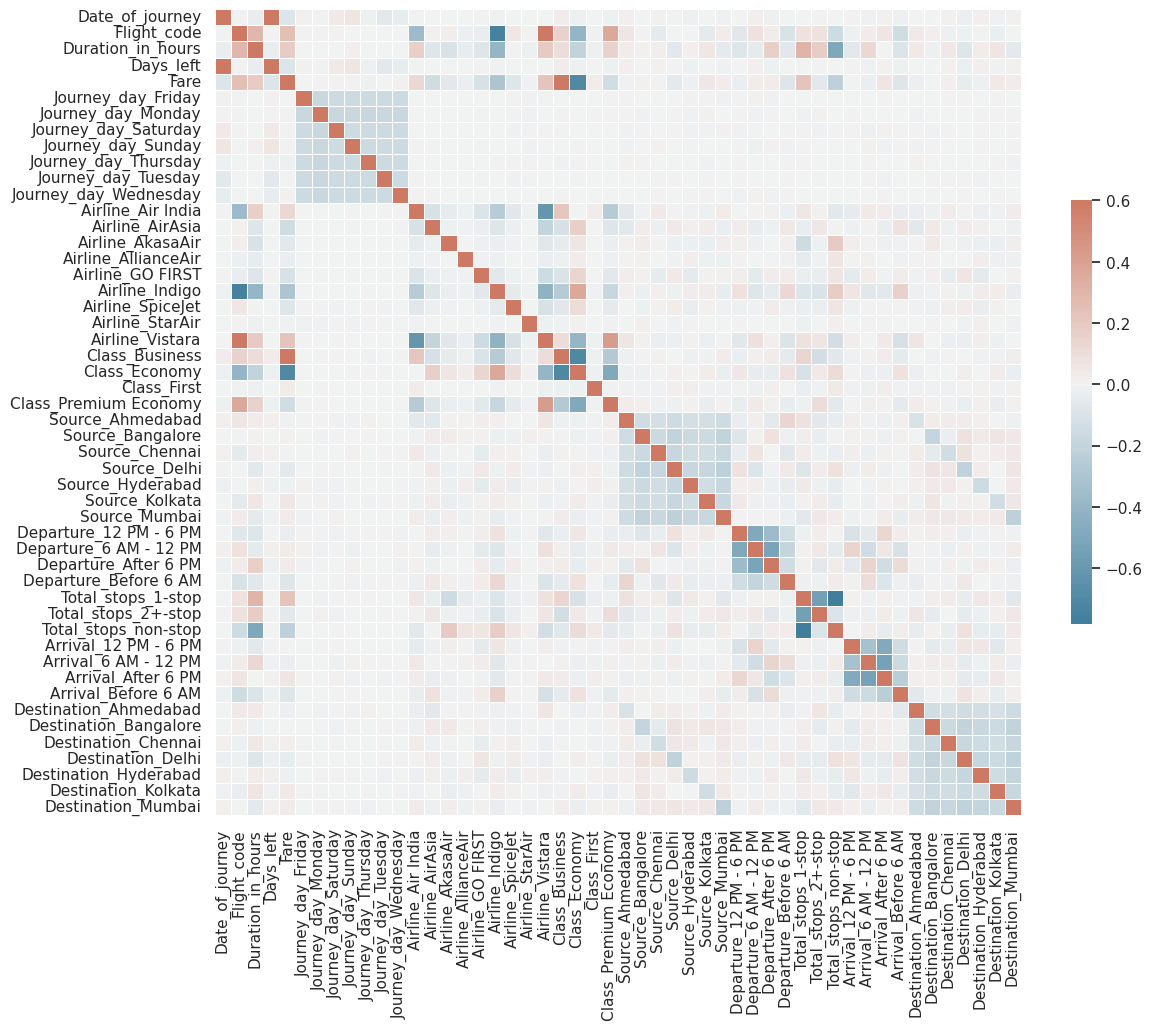

In [11]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
corr_matrix = df.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,cmap=cmap,fmt='.3f', vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
df.to_csv('df_fixed.csv', index=False)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

models_dict = {}

df.sort_values(by='Date_of_journey')

df['year'] = df['Date_of_journey'].dt.year
df['month'] = df['Date_of_journey'].dt.month
df['day'] = df['Date_of_journey'].dt.day


X=df.drop(['Fare','Date_of_journey'],axis=1)
y=df['Fare']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

Flight_code  Duration_in_hours  Days_left  Journey_day_Friday  \
350132         1300          -0.675744  -0.532618                 0.0   
253225         1304          -0.047839   0.516143                 1.0   
300824            4          -1.052489   1.634821                 0.0   
203178          355          -0.572995   0.306390                 0.0   
13353          1259          -0.835580   0.655977                 0.0   
...             ...                ...        ...                 ...   
259178          752          -1.486322  -1.371627                 0.0   
365838         1305          -0.025001   0.166556                 0.0   
131932          856           0.032086  -0.672453                 0.0   
146867         1403           1.322146   0.306390                 0.0   
121958         1401          -0.755655   0.166556                 0.0   

        Journey_day_Monday  Journey_day_Saturday  Journey_day_Sunday  \
350132                 0.0                   0.0                 0.0   
253225                 0.0                   0.0                 0.0   
300824                 0.0                   0.0                 1.0   
203178                 0.0                   0.0                 0.0   
13353                  0.0                   0.0                 1.0   
...                    ...                   ...                 ...   
259178                 0.0                   1.0                 0.0   
365838                 0.0                   0.0                 1.0   
131932                 0.0                   0.0                 0.0   
146867                 0.0                   0.0                 0.0   
121958                 0.0                   0.0                 1.0   

        Journey_day_Thursday  Journey_day_Tuesday  Journey_day_Wednesday  ...  \
350132                   1.0                  0.0                    0.0  ...   
253225                   0.0                  0.0                    0.0  ...   
300824                   0.0                  0.0                    0.0  ...   
203178                   0.0                  1.0                    0.0  ...   
13353                    0.0                  0.0                    0.0  ...   
...                      ...                  ...                    ...  ...   
259178                   0.0                  0.0                    0.0  ...   
365838                   0.0                  0.0                    0.0  ...   
131932                   0.0                  1.0                    0.0  ...   
146867                   0.0                  1.0                    0.0  ...   
121958                   0.0                  0.0                    0.0  ...   

        Destination_Ahmedabad  Destination_Bangalore  Destination_Chennai  \
350132                    0.0                    0.0                  0.0   
253225                    0.0                    0.0                  0.0   
300824                    0.0                    0.0                  0.0   
203178                    0.0                    0.0                  0.0   
13353                     0.0                    0.0                  0.0   
...                       ...                    ...                  ...   
259178                    0.0                    1.0                  0.0   
365838                    0.0                    0.0                  0.0   
131932                    0.0                    0.0                  0.0   
146867                    0.0                    0.0                  1.0   
121958                    0.0                    0.0                  0.0   

        Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
350132                1.0                    0.0                  0.0   
253225                0.0                    0.0                  0.0   
300824                1.0                    0.0                  0.0   
203178                0.0                    1.0                  0.0   
133

In [14]:
model = DecisionTreeRegressor(criterion='squared_error', random_state=42)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [15]:
score = r2_score(y_preds, y_test)
print (score)

0.9396866273444454


In [16]:
def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

print (MAPE (y_test, y_preds))
RMSE (y_test, y_preds)
models_dict['DecisionTreeRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

9.305685563318876


In [17]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

<Figure size 2000x800 with 0 Axes>

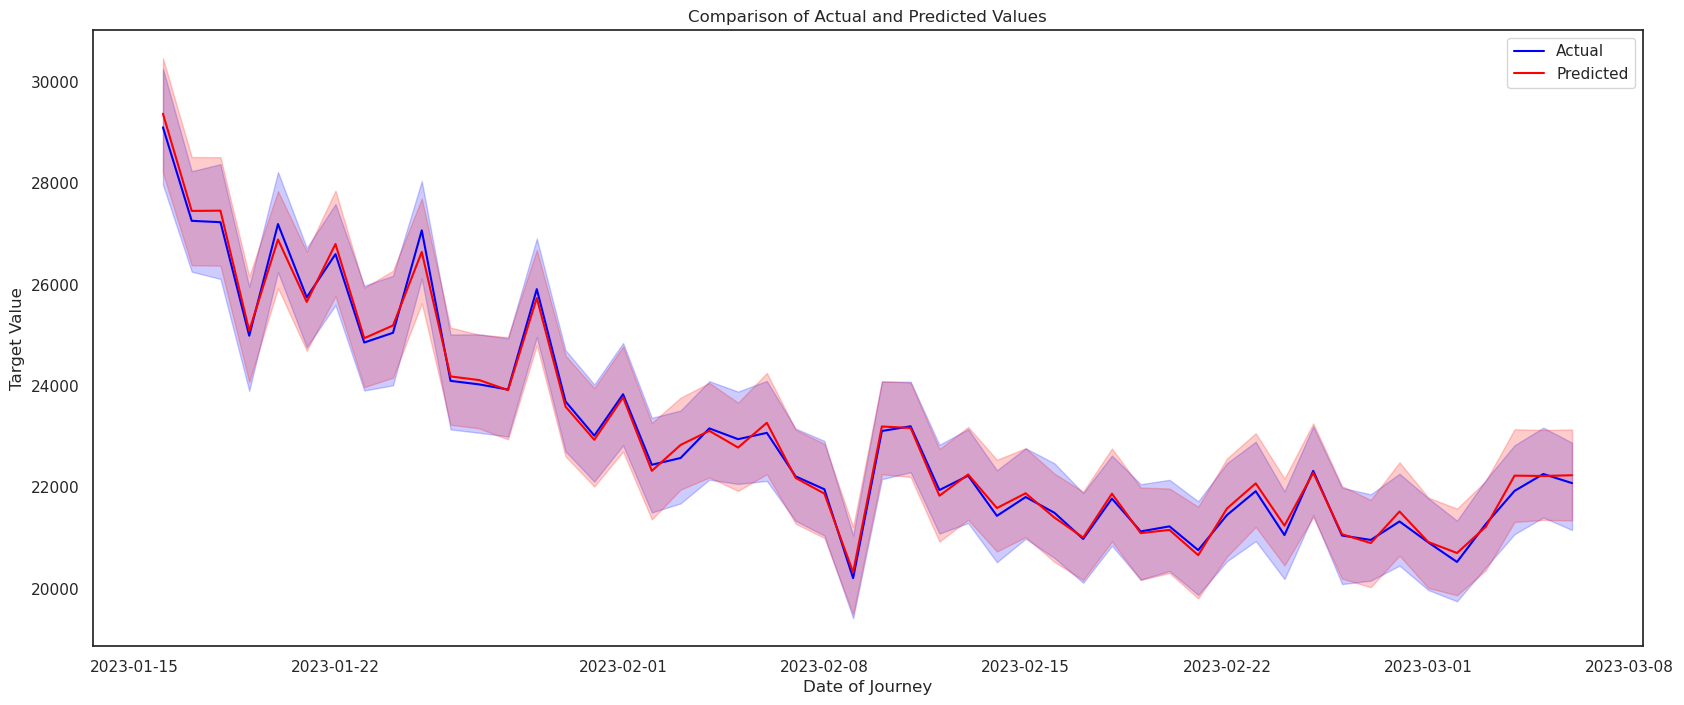

In [18]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

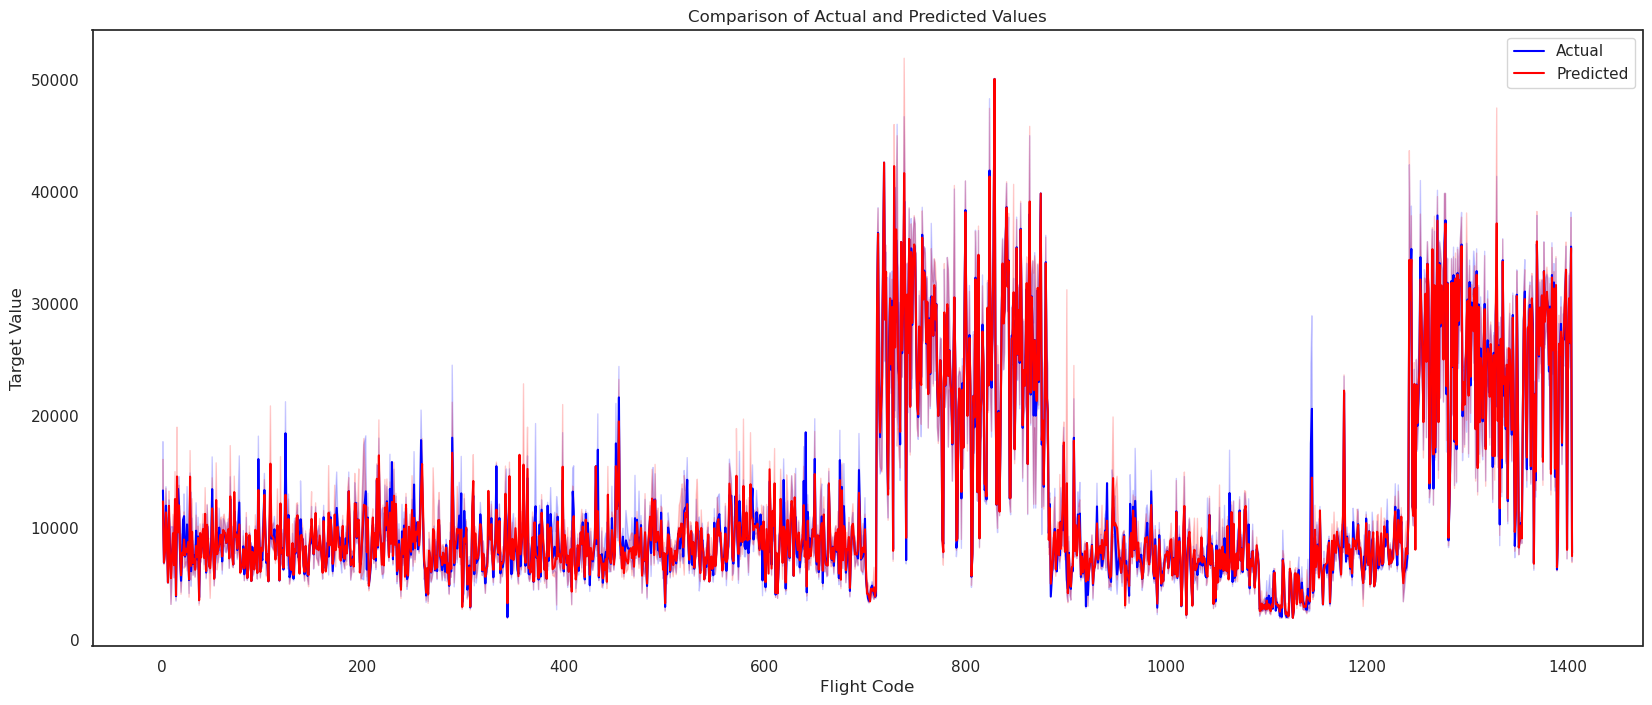

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


In [20]:
score = r2_score(y_preds, y_test)
print (score)
print(MAPE (y_test, y_preds))

models_dict['RandomForestRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9654771911289514
7.990554757202098


In [21]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

Date_of_journey  Flight_code  Duration_in_hours  Days_left   Fare  \
24       2023-01-16         1057            16.5000          1   6872   
30       2023-01-16           87             2.3333          1   7319   
31       2023-01-16         1396             2.2500          1   7320   
35       2023-01-16          899             9.7500          1   6873   
53       2023-01-16           46             2.2500          1   7844   
..              ...          ...                ...        ...    ...   
501      2023-01-17          195             6.2500          2  11257   
502      2023-01-17         1252             5.2500          2  11573   
508      2023-01-17          913             8.5833          2  11546   
517      2023-01-17         1327             6.4167          2  12570   
518      2023-01-17         1303             7.2500          2  12570   

     Journey_day_Friday  Journey_day_Monday  Journey_day_Saturday  \
24                  0.0                 1.0                   0.0   
30                  0.0                 1.0                   0.0   
31                  0.0                 1.0                   0.0   
35                  0.0                 1.0                   0.0   
53                  0.0                 1.0                   0.0   
..                  ...                 ...                   ...   
501                 0.0                 0.0                   0.0   
502                 0.0                 0.0                   0.0   
508                 0.0                 0.0                   0.0   
517                 0.0                 0.0                   0.0   
518                 0.0                 0.0                   0.0   

     Journey_day_Sunday  Journey_day_Thursday  ...  Destination_Chennai  \
24                  0.0                   0.0  ...                  0.0   
30                  0.0                   0.0  ...                  0.0   
31                  0.0                   0.0  ...                  0.0   
35                  0.0                   0.0  ...                  0.0   
53                  0.0                   0.0  ...                  0.0   
..                  ...                   ...  ...                  ...   
501                 0.0                   0.0  ...                  0.0   
502                 0.0                   0.0  ...                  0.0   
508                 0.0                   0.0  ...                  0.0   
517                 0.0                   0.0  ...                  0.0   
518                 0.0                   0.0  ...                  0.0   

     Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
24                 0.0                    0.0                  0.0   
30                 0.0                    0.0                  0.0   
31                 0.0                    0.0                  0.0   
35                 0.0                    0.0                  0.0   
53                 0.0                    0.0                  0.0   
..                 ...                    ...                  ...   
501                0.0                    0.0                  0.0   
502                0.0                    0.0                  0.0   
508                0.0                    0.0                  0.0   
517                0.0                    0.0                  0.0   
518                0.0                    0.0                  0.0   

     Destination_Mumbai  year  month  day  Price_actual  Price_pred  
24                  1.0  2023      1   16          6872     6840.08  
30                  1.0  2023      1   16          7319     7632.33  
31                  1.0  2023      1   16          7320    11446.66  
35                  1.0  2023      1   16          6873     9564.93  
53                  1.0  2023      1   16          7844     7388.28  
..                  ...   ...    ...  ...           ...         ...  
501                 1.0  2023      1   17         11257    14643.2

In [22]:
airline_df = result[result['Airline_Indigo']==1]
airline_df = airline_df[airline_df['Class_Economy']==1]

<Figure size 2000x800 with 0 Axes>

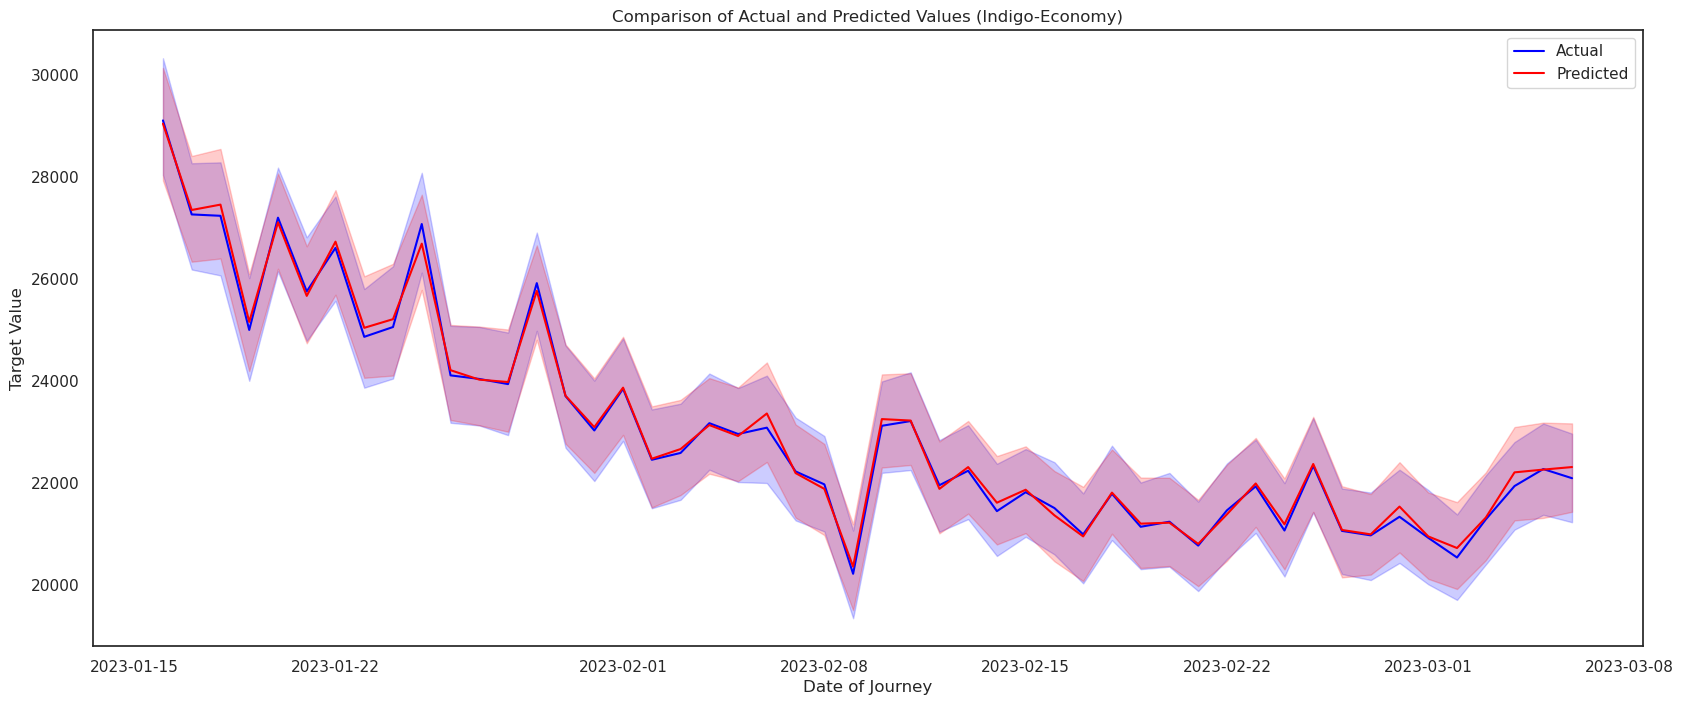

In [23]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
''''''
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values (Indigo-Economy)')
plt.legend()
plt.show()

<Figure size 2000x800 with 0 Axes>

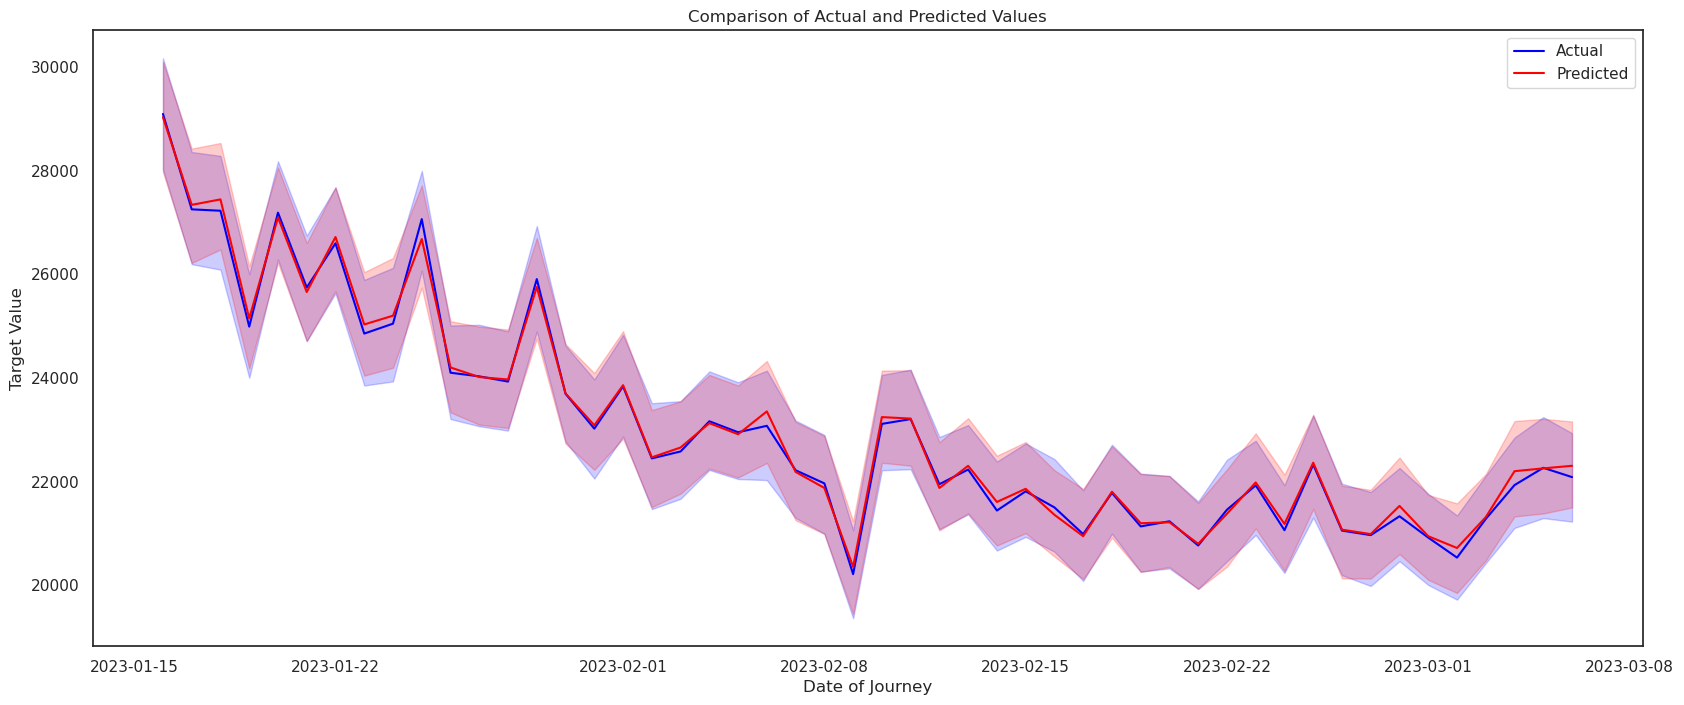

In [24]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

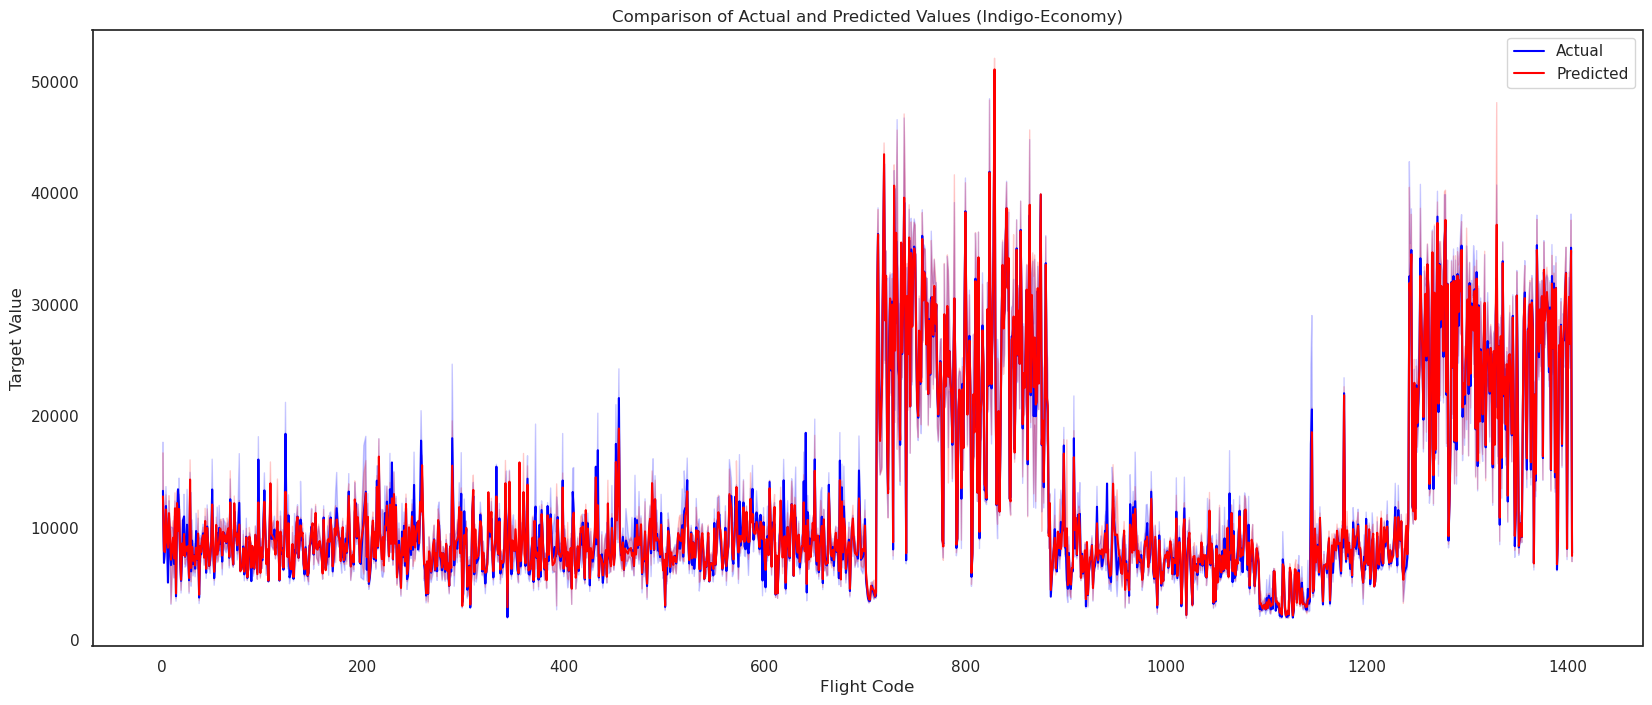

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values (Indigo-Economy)')
plt.legend()
plt.show()

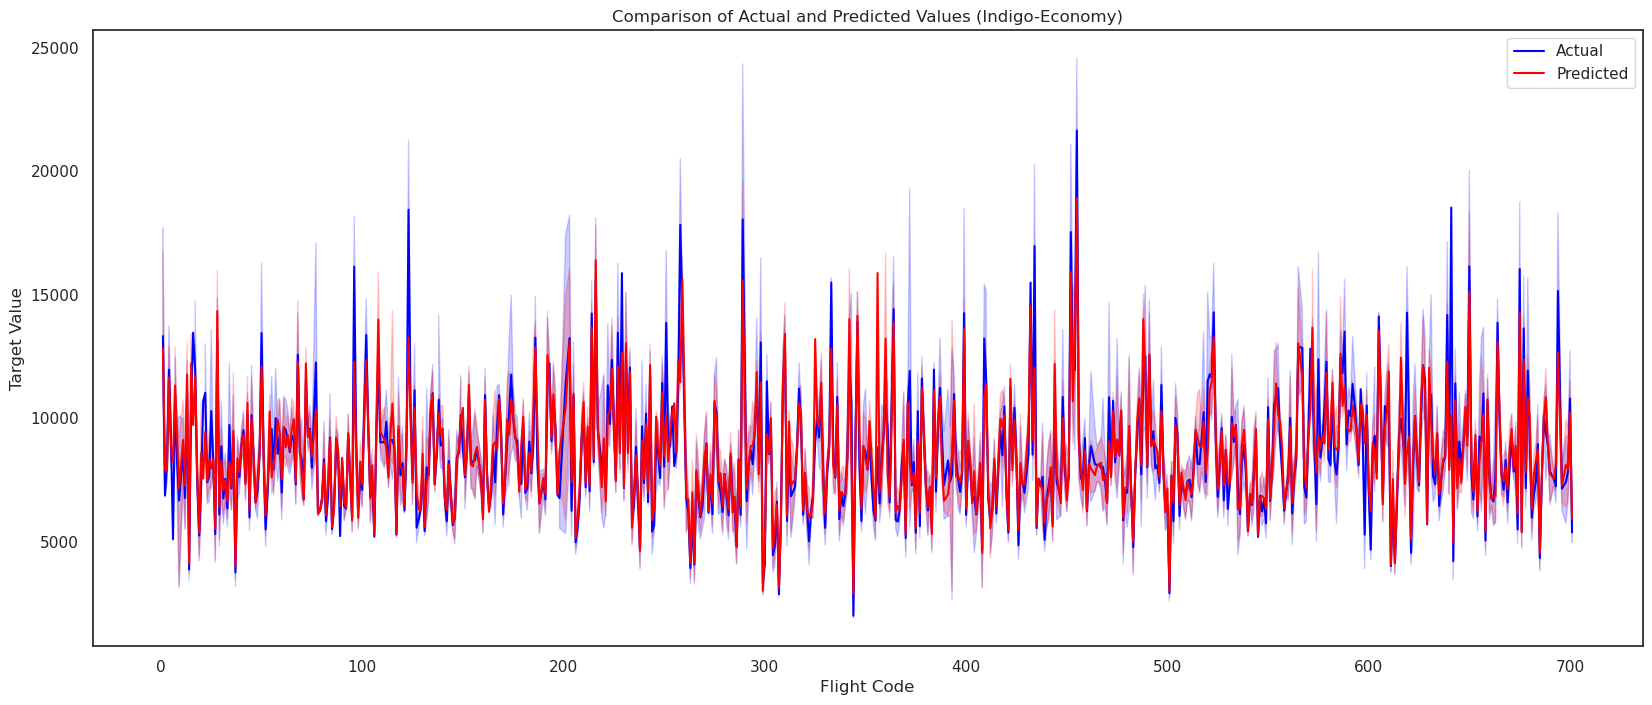

In [28]:
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values (Indigo-Economy)')
plt.legend()
plt.show()

In [25]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.get_params()

model = xgb.XGBRegressor(
    booster='gbtree',
    learning_rate=0.3,
    n_estimators=200,
    max_depth=7,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0,
    objective='reg:squarederror',
    seed=42
)

In [26]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [27]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['XGBRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9602570533752441
11.537251486743253


In [28]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

Date_of_journey  Flight_code  Duration_in_hours  Days_left   Fare  \
24       2023-01-16         1057            16.5000          1   6872   
30       2023-01-16           87             2.3333          1   7319   
31       2023-01-16         1396             2.2500          1   7320   
35       2023-01-16          899             9.7500          1   6873   
53       2023-01-16           46             2.2500          1   7844   
..              ...          ...                ...        ...    ...   
501      2023-01-17          195             6.2500          2  11257   
502      2023-01-17         1252             5.2500          2  11573   
508      2023-01-17          913             8.5833          2  11546   
517      2023-01-17         1327             6.4167          2  12570   
518      2023-01-17         1303             7.2500          2  12570   

     Journey_day_Friday  Journey_day_Monday  Journey_day_Saturday  \
24                  0.0                 1.0                   0.0   
30                  0.0                 1.0                   0.0   
31                  0.0                 1.0                   0.0   
35                  0.0                 1.0                   0.0   
53                  0.0                 1.0                   0.0   
..                  ...                 ...                   ...   
501                 0.0                 0.0                   0.0   
502                 0.0                 0.0                   0.0   
508                 0.0                 0.0                   0.0   
517                 0.0                 0.0                   0.0   
518                 0.0                 0.0                   0.0   

     Journey_day_Sunday  Journey_day_Thursday  ...  Destination_Chennai  \
24                  0.0                   0.0  ...                  0.0   
30                  0.0                   0.0  ...                  0.0   
31                  0.0                   0.0  ...                  0.0   
35                  0.0                   0.0  ...                  0.0   
53                  0.0                   0.0  ...                  0.0   
..                  ...                   ...  ...                  ...   
501                 0.0                   0.0  ...                  0.0   
502                 0.0                   0.0  ...                  0.0   
508                 0.0                   0.0  ...                  0.0   
517                 0.0                   0.0  ...                  0.0   
518                 0.0                   0.0  ...                  0.0   

     Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
24                 0.0                    0.0                  0.0   
30                 0.0                    0.0                  0.0   
31                 0.0                    0.0                  0.0   
35                 0.0                    0.0                  0.0   
53                 0.0                    0.0                  0.0   
..                 ...                    ...                  ...   
501                0.0                    0.0                  0.0   
502                0.0                    0.0                  0.0   
508                0.0                    0.0                  0.0   
517                0.0                    0.0                  0.0   
518                0.0                    0.0                  0.0   

     Destination_Mumbai  year  month  day  Price_actual    Price_pred  
24                  1.0  2023      1   16          6872   6247.735840  
30                  1.0  2023      1   16          7319   8379.364258  
31                  1.0  2023      1   16          7320  12369.815430  
35                  1.0  2023      1   16          6873  10947.355469  
53                  1.0  2023      1   16          7844   9108.237305  
..                  ...   ...    ...  ...           ...           ...  
501                 1.0  2023      1   17         11

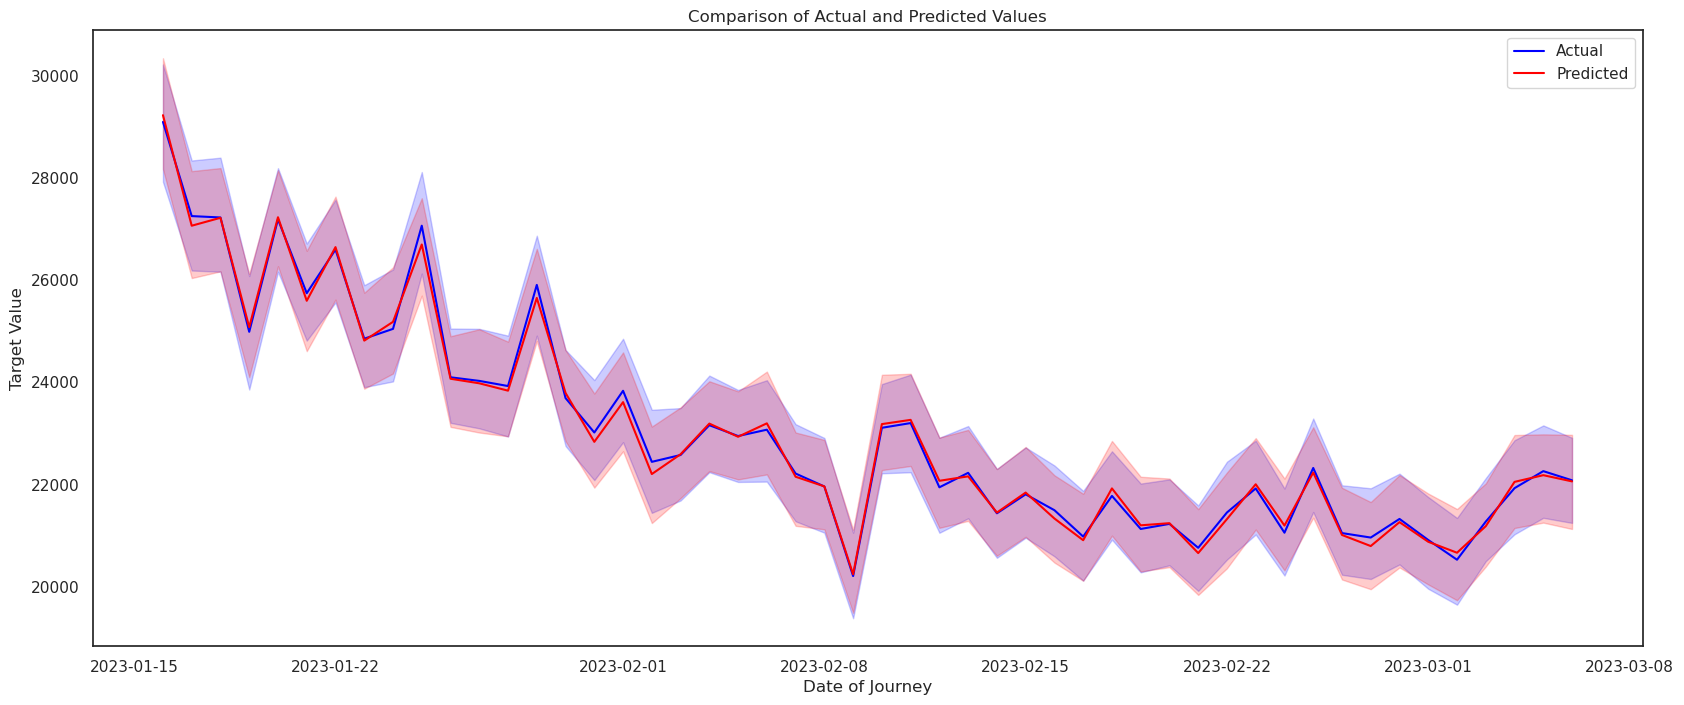

In [29]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

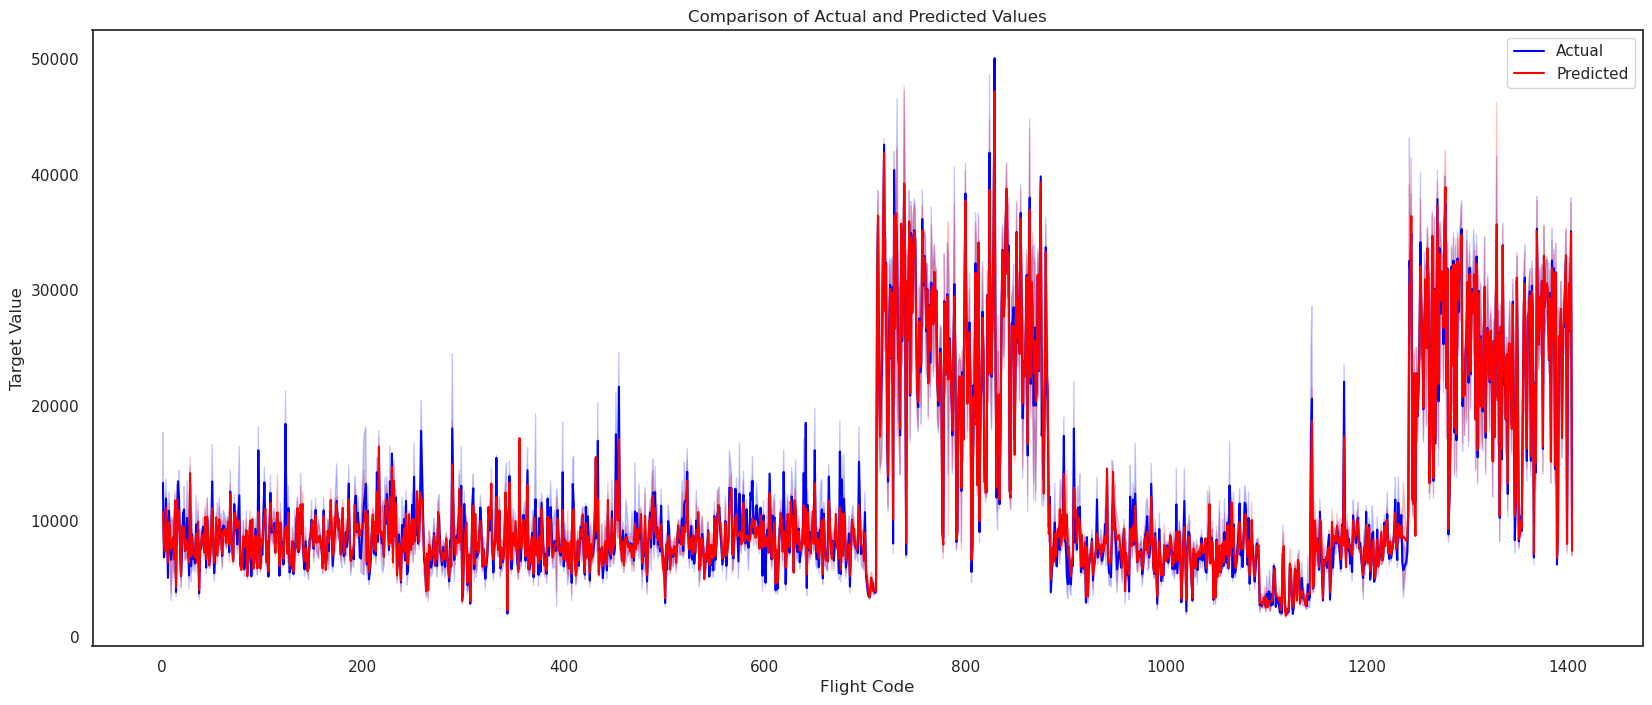

In [34]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [30]:

import catboost as cb

model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.3,
    depth=7,
    loss_function='MAE',
    random_seed=42
)


In [31]:
model.fit(X_train, y_train)
y_preds = model.predict(X_test)


0:	learn: 10506.4776243	total: 240ms	remaining: 3m 59s
1:	learn: 8044.3825922	total: 325ms	remaining: 2m 42s
2:	learn: 6398.4913928	total: 411ms	remaining: 2m 16s
3:	learn: 5422.3739641	total: 496ms	remaining: 2m 3s
4:	learn: 4841.2011141	total: 587ms	remaining: 1m 56s
5:	learn: 4501.4865741	total: 668ms	remaining: 1m 50s
6:	learn: 4313.7019453	total: 739ms	remaining: 1m 44s
7:	learn: 4220.9078692	total: 820ms	remaining: 1m 41s
8:	learn: 4070.8441934	total: 900ms	remaining: 1m 39s
9:	learn: 3967.1880236	total: 969ms	remaining: 1m 35s
10:	learn: 3886.5910173	total: 1.03s	remaining: 1m 33s
11:	learn: 3845.4226321	total: 1.07s	remaining: 1m 28s
12:	learn: 3817.5193665	total: 1.11s	remaining: 1m 24s
13:	learn: 3764.1285702	total: 1.15s	remaining: 1m 21s
14:	learn: 3722.5691744	total: 1.2s	remaining: 1m 19s
15:	learn: 3698.9708850	total: 1.25s	remaining: 1m 16s
16:	learn: 3679.7181237	total: 1.29s	remaining: 1m 14s
17:	learn: 3653.2284463	total: 1.33s	remaining: 1m 12s
18:	learn: 3631.64916

In [32]:
y_preds.shape
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['CatBoostRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9419104265517024
9.844294549718557


In [33]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

Date_of_journey  Flight_code  Duration_in_hours  Days_left   Fare  \
24       2023-01-16         1057            16.5000          1   6872   
30       2023-01-16           87             2.3333          1   7319   
31       2023-01-16         1396             2.2500          1   7320   
35       2023-01-16          899             9.7500          1   6873   
53       2023-01-16           46             2.2500          1   7844   
..              ...          ...                ...        ...    ...   
501      2023-01-17          195             6.2500          2  11257   
502      2023-01-17         1252             5.2500          2  11573   
508      2023-01-17          913             8.5833          2  11546   
517      2023-01-17         1327             6.4167          2  12570   
518      2023-01-17         1303             7.2500          2  12570   

     Journey_day_Friday  Journey_day_Monday  Journey_day_Saturday  \
24                  0.0                 1.0                   0.0   
30                  0.0                 1.0                   0.0   
31                  0.0                 1.0                   0.0   
35                  0.0                 1.0                   0.0   
53                  0.0                 1.0                   0.0   
..                  ...                 ...                   ...   
501                 0.0                 0.0                   0.0   
502                 0.0                 0.0                   0.0   
508                 0.0                 0.0                   0.0   
517                 0.0                 0.0                   0.0   
518                 0.0                 0.0                   0.0   

     Journey_day_Sunday  Journey_day_Thursday  ...  Destination_Chennai  \
24                  0.0                   0.0  ...                  0.0   
30                  0.0                   0.0  ...                  0.0   
31                  0.0                   0.0  ...                  0.0   
35                  0.0                   0.0  ...                  0.0   
53                  0.0                   0.0  ...                  0.0   
..                  ...                   ...  ...                  ...   
501                 0.0                   0.0  ...                  0.0   
502                 0.0                   0.0  ...                  0.0   
508                 0.0                   0.0  ...                  0.0   
517                 0.0                   0.0  ...                  0.0   
518                 0.0                   0.0  ...                  0.0   

     Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
24                 0.0                    0.0                  0.0   
30                 0.0                    0.0                  0.0   
31                 0.0                    0.0                  0.0   
35                 0.0                    0.0                  0.0   
53                 0.0                    0.0                  0.0   
..                 ...                    ...                  ...   
501                0.0                    0.0                  0.0   
502                0.0                    0.0                  0.0   
508                0.0                    0.0                  0.0   
517                0.0                    0.0                  0.0   
518                0.0                    0.0                  0.0   

     Destination_Mumbai  year  month  day  Price_actual    Price_pred  
24                  1.0  2023      1   16          6872   7081.870306  
30                  1.0  2023      1   16          7319   7529.171700  
31                  1.0  2023      1   16          7320  12435.547549  
35                  1.0  2023      1   16          6873  11013.717528  
53                  1.0  2023      1   16          7844   8156.396194  
..                  ...   ...    ...  ...           ...           ...  
501                 1.0  2023      1   17         11

<Figure size 2000x800 with 0 Axes>

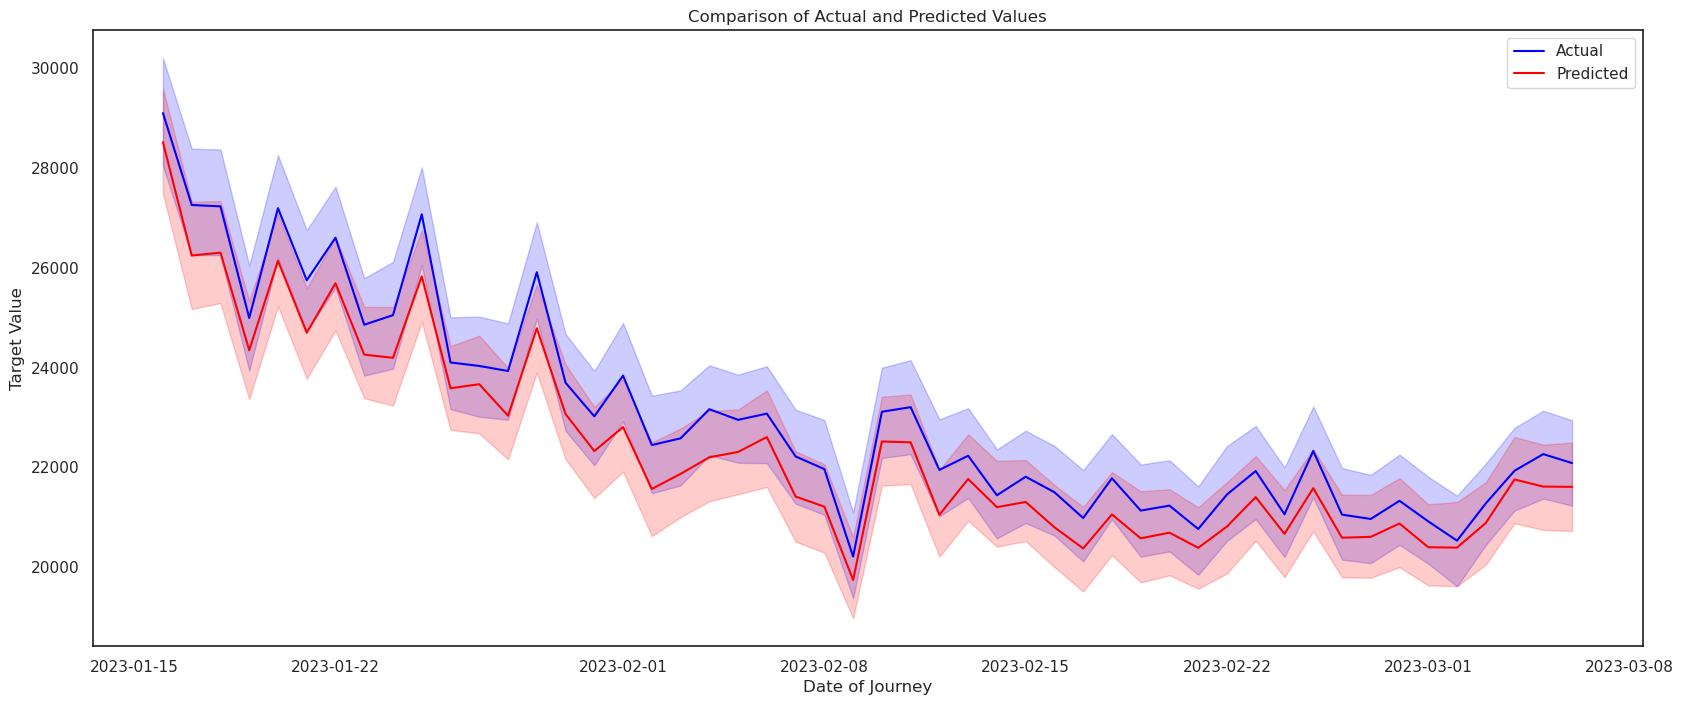

In [34]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

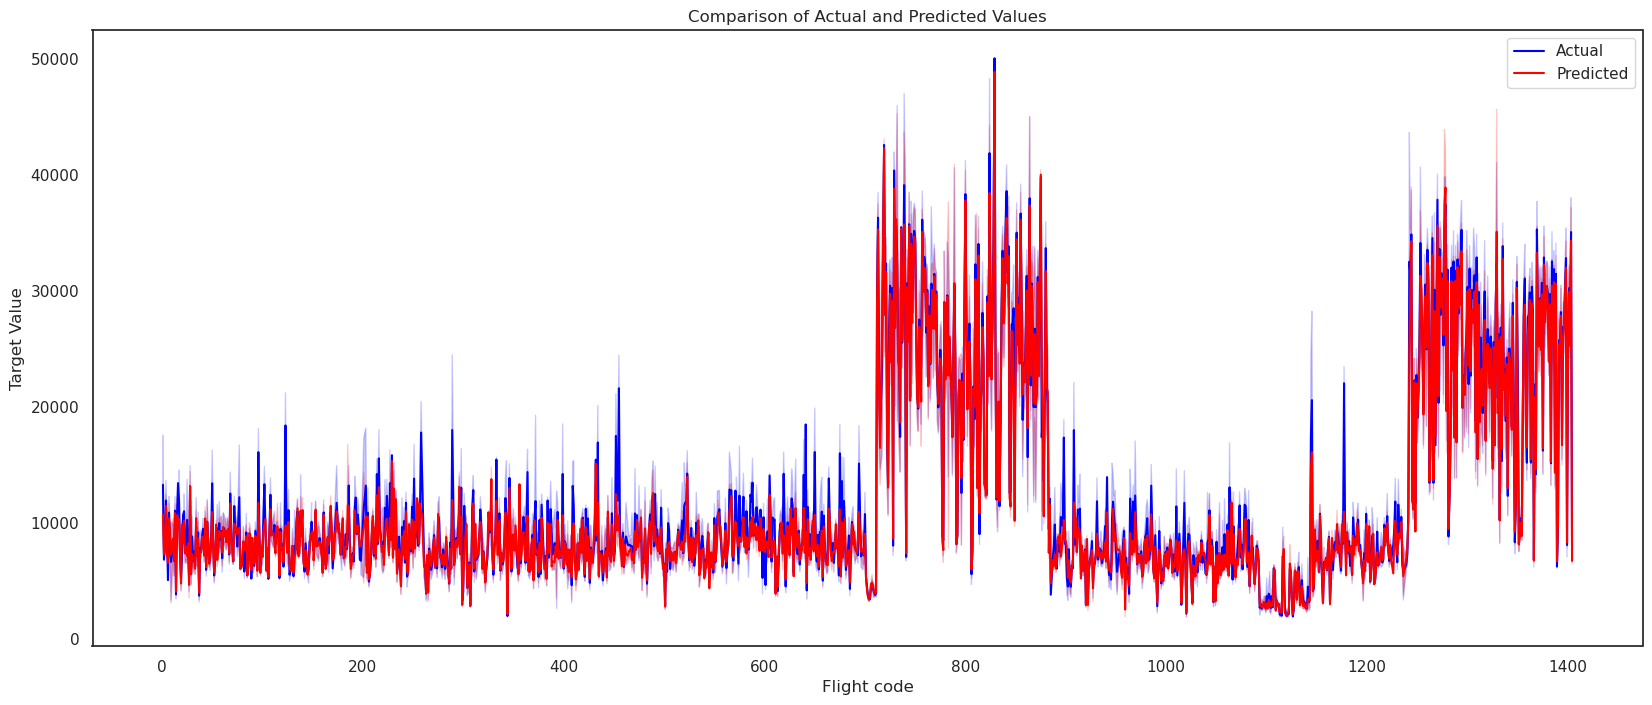

In [35]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [36]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [37]:
score = r2_score(y_preds, y_test)
print (score)
print (MAPE (y_test, y_preds))

models_dict['BaggingRegressor'] = (model, score, MAPE(y_test, y_preds), RMSE (y_test, y_preds))

0.9655133397879178
7.986495184355885


In [38]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

result.head(100)

Date_of_journey  Flight_code  Duration_in_hours  Days_left   Fare  \
24       2023-01-16         1057            16.5000          1   6872   
30       2023-01-16           87             2.3333          1   7319   
31       2023-01-16         1396             2.2500          1   7320   
35       2023-01-16          899             9.7500          1   6873   
53       2023-01-16           46             2.2500          1   7844   
..              ...          ...                ...        ...    ...   
501      2023-01-17          195             6.2500          2  11257   
502      2023-01-17         1252             5.2500          2  11573   
508      2023-01-17          913             8.5833          2  11546   
517      2023-01-17         1327             6.4167          2  12570   
518      2023-01-17         1303             7.2500          2  12570   

     Journey_day_Friday  Journey_day_Monday  Journey_day_Saturday  \
24                  0.0                 1.0                   0.0   
30                  0.0                 1.0                   0.0   
31                  0.0                 1.0                   0.0   
35                  0.0                 1.0                   0.0   
53                  0.0                 1.0                   0.0   
..                  ...                 ...                   ...   
501                 0.0                 0.0                   0.0   
502                 0.0                 0.0                   0.0   
508                 0.0                 0.0                   0.0   
517                 0.0                 0.0                   0.0   
518                 0.0                 0.0                   0.0   

     Journey_day_Sunday  Journey_day_Thursday  ...  Destination_Chennai  \
24                  0.0                   0.0  ...                  0.0   
30                  0.0                   0.0  ...                  0.0   
31                  0.0                   0.0  ...                  0.0   
35                  0.0                   0.0  ...                  0.0   
53                  0.0                   0.0  ...                  0.0   
..                  ...                   ...  ...                  ...   
501                 0.0                   0.0  ...                  0.0   
502                 0.0                   0.0  ...                  0.0   
508                 0.0                   0.0  ...                  0.0   
517                 0.0                   0.0  ...                  0.0   
518                 0.0                   0.0  ...                  0.0   

     Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
24                 0.0                    0.0                  0.0   
30                 0.0                    0.0                  0.0   
31                 0.0                    0.0                  0.0   
35                 0.0                    0.0                  0.0   
53                 0.0                    0.0                  0.0   
..                 ...                    ...                  ...   
501                0.0                    0.0                  0.0   
502                0.0                    0.0                  0.0   
508                0.0                    0.0                  0.0   
517                0.0                    0.0                  0.0   
518                0.0                    0.0                  0.0   

     Destination_Mumbai  year  month  day  Price_actual  Price_pred  
24                  1.0  2023      1   16          6872     6856.64  
30                  1.0  2023      1   16          7319     7608.20  
31                  1.0  2023      1   16          7320    11736.35  
35                  1.0  2023      1   16          6873     9587.08  
53                  1.0  2023      1   16          7844     7444.05  
..                  ...   ...    ...  ...           ...         ...  
501                 1.0  2023      1   17         11257    14912.9

In [40]:
# make a df where Airline is Indigio and Class is Economy
airline_df = result[result['Airline_Indigo']==1]
airline_df = airline_df[airline_df['Class_Economy']==1]

<Figure size 2000x800 with 0 Axes>

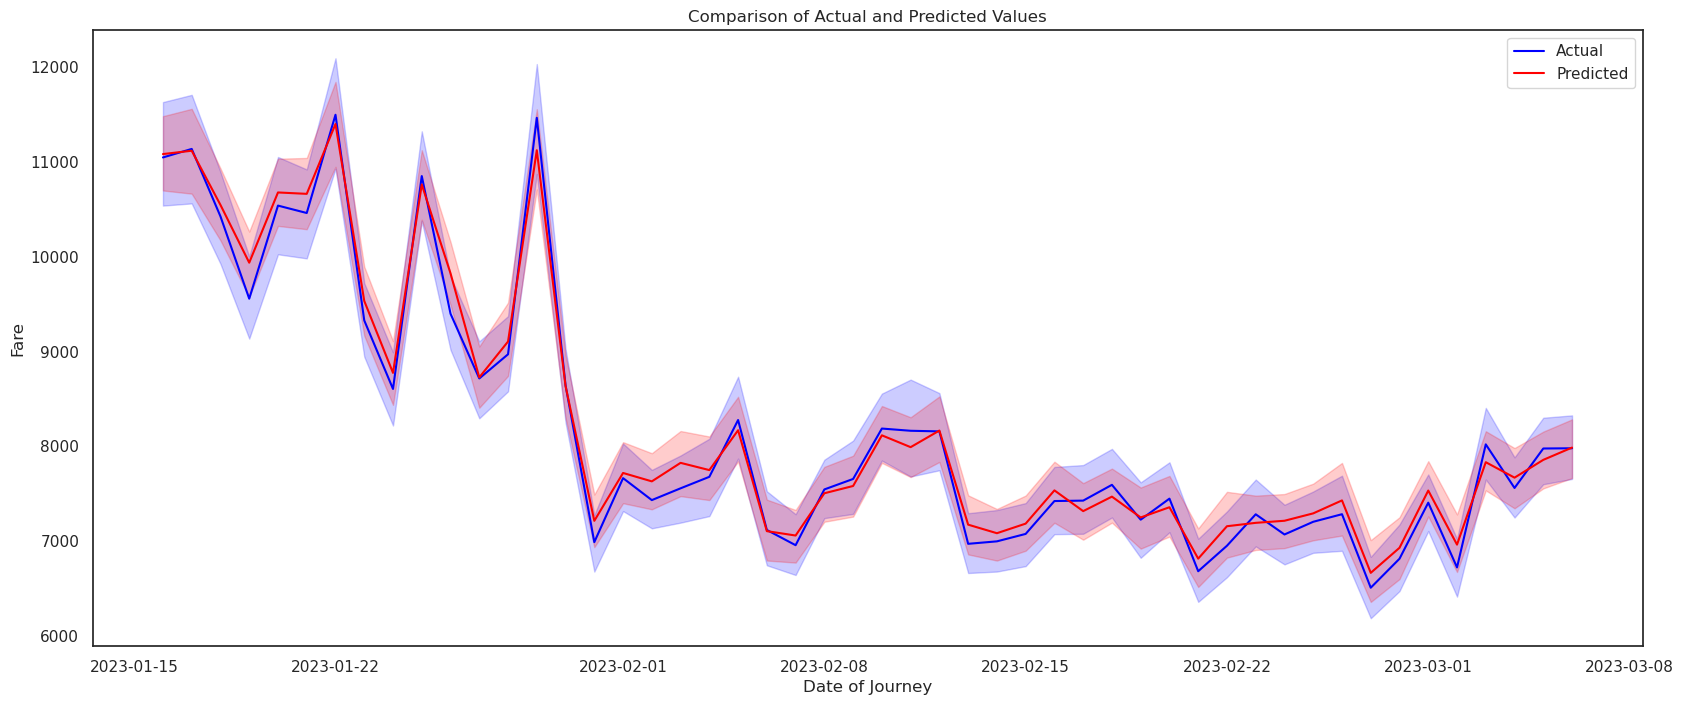

In [41]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Fare')
plt.title('Comparison of Actual and Predicted Values (Indigo-Economy)')
plt.legend()
plt.show()

<Figure size 2000x800 with 0 Axes>

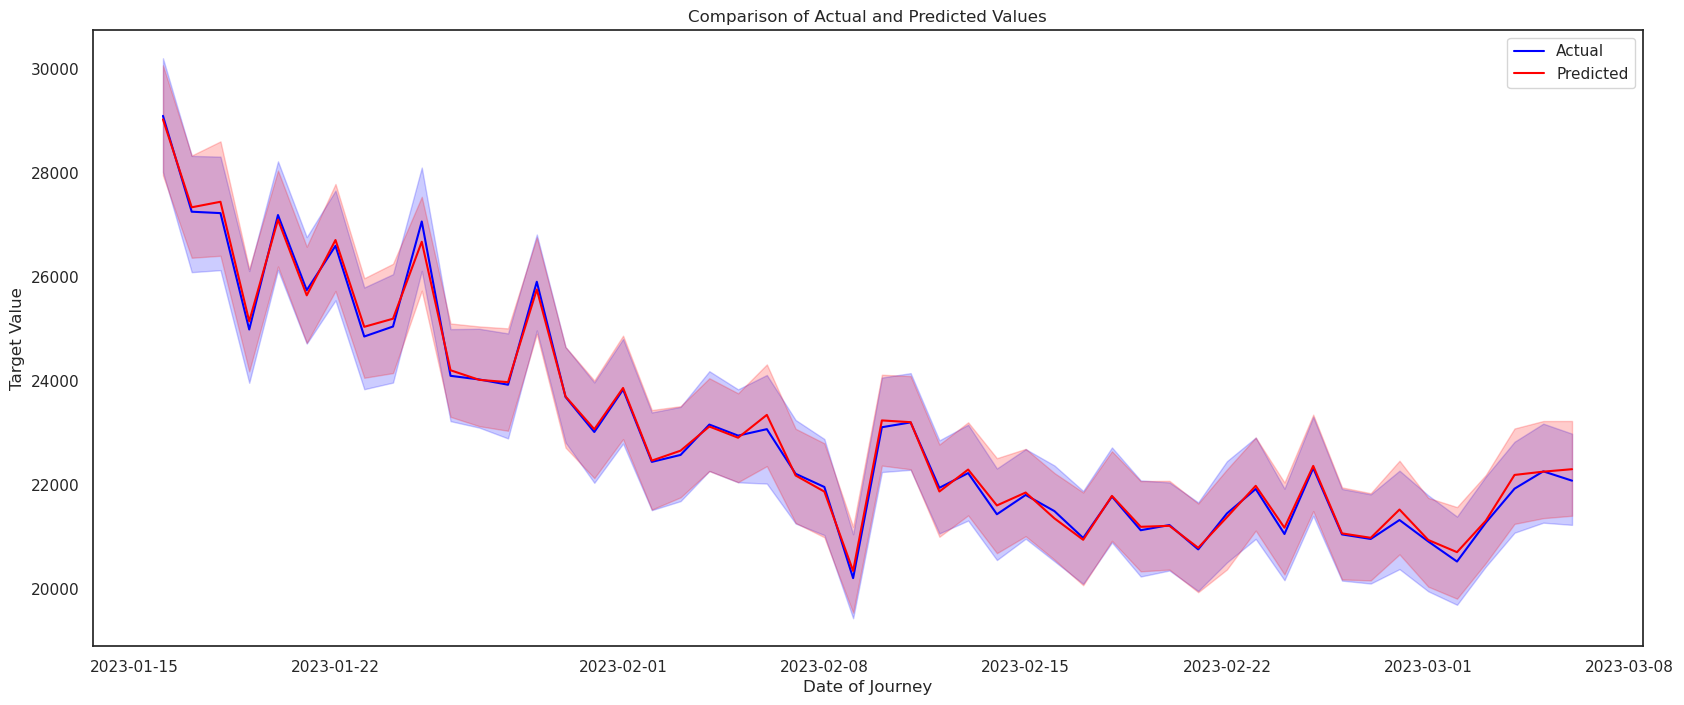

In [43]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [44]:
model = "LSTMModel((lstm): LSTM(13, 50, num_layers=4, batch_first=True), (fc): Linear(in_features=50, out_features=1, bias=True))"

R2_Score = 0.8519364959859111

MAPE = 23.626225

RMSE = 4997.5527

#models_dict['LSTM'] = (model, R2_Score, MAPE, RMSE)

In [45]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ['Model','R2 Score', 'MAPE', 'RMSE']


In [46]:
models_df

Model  \
DecisionTreeRegressor             DecisionTreeRegressor(random_state=42)   
RandomForestRegressor  (DecisionTreeRegressor(max_features=1.0, rando...   
XGBRegressor           XGBRegressor(base_score=None, booster='gbtree'...   
CatBoostRegressor      <catboost.core.CatBoostRegressor object at 0x7...   
BaggingRegressor       (DecisionTreeRegressor(random_state=1952926171...   

                       R2 Score       MAPE         RMSE  
DecisionTreeRegressor  0.939687   9.305686  5034.290577  
RandomForestRegressor  0.965477   7.990555  3740.582843  
XGBRegressor           0.960257  11.537251  3979.478441  
CatBoostRegressor       0.94191   9.844295  4676.335305  
BaggingRegressor       0.965513   7.986495  3738.626134